### Exploratory Data Analysis

In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\Neel\\Desktop\\Greyatom Codes\\Datasets\\flags.csv")
df.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colors,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [2]:
df.shape

(194, 30)

In [3]:
df[df["bars"]==df["bars"].max()]["name"].iloc[0]

'St-Vincent'

In [4]:
df[df["population"]==df["population"].max()]["name"].iloc[0]

'China'

In [5]:
(df[df["orange"]==1].shape[0]/df.shape[0])*100

13.402061855670103

In [6]:
(df[df["stripes"]>1].shape[0]/df.shape[0])*100

41.23711340206185

In [7]:
(df[df["red"]==1].shape[0]/df.shape[0])*((df[df["red"]==1].shape[0] -1)/(df.shape[0]-1))*((df[df["red"]==1].shape[0] -2)/(df.shape[0]-2))

0.4884855242775493

In [8]:
(df[df["red"]==1].shape[0]+df[df["orange"]==1].shape[0]-df[(df["red"]==1) & (df['orange']==1)].shape[0])/df.shape[0]

0.8247422680412371

In [9]:
df[(df["red"]==1) | (df['orange']==1)].shape[0]/df.shape[0]

0.8247422680412371

In [10]:
df[(df["stripes"] >= 1) | (df['bars']>= 1)].shape[0]/df.shape[0]

0.5927835051546392

In [11]:
(df[df["stripes"]>=1].shape[0]+df[df["bars"]>=1].shape[0]-df[(df["stripes"]>=1) & (df['bars']>=1)].shape[0])/df.shape[0]

0.5927835051546392

In [12]:
1-(df[df["stripes"]==0].shape[0]/df.shape[0])

0.4329896907216495

In [13]:
1-(df[df["bars"]==0].shape[0]/df.shape[0])

0.18041237113402064

In [14]:
1-((df[(df["stripes"]==0) & (df['bars']==0)].shape[0])/df.shape[0])

0.5927835051546392

In [15]:
bike=pd.read_csv("C:\\Users\\Neel\\Desktop\\Greyatom Codes\\Datasets\\bike_rental_day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [47]:
prob=bike[bike["cnt"]>4000].shape[0]/bike.shape[0]

### Understanding of different Distributions

In [16]:
import math
def combination(n,r):
    c=math.factorial(n)/(math.factorial(n-r)*math.factorial(r))
    return c

In [17]:
combination(25,3)

2300.0

In [18]:
def Binomial(p,n,r):
    q=1-p
    b=combination(n,r)*(p**r)*(q**(n-r))
    return b

In [19]:
Binomial(0.8,12,8)

0.13287555071999996

### Implementation of KNN from scratch

In [22]:
import matplotlib.pyplot as plt

In [23]:
d=pd.read_csv("C:\\Users\\Neel\\Desktop\\Greyatom Codes\\Datasets\\diabetes.csv")
d.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
df=d.drop(["diabetes"],axis=1)

In [25]:
from scipy.spatial.distance import euclidean,cosine
def Calculate_Cosine_Distance(temp,X_train):
    l=[]
    for i in range(0,X_train.shape[0]):
        l.append(cosine(X_train.iloc[i],temp))
    cosine_distance=pd.Series(l)
    return cosine_distance

In [26]:
from sklearn.model_selection import train_test_split
l=[]
X_train=df.head(500)
X_test=df.iloc[501:,:]
for i in range(0,X_test.shape[0]):
    t=X_test.iloc[i]
    cosine_d=Calculate_Cosine_Distance(t,X_train)
    result=cosine_d.sort_values().head(7)
    count0=0
    count1=0
    for i in range(0,result.shape[0]):
        if(d["diabetes"].iloc[result.index[i]] == 1):
            count1=count1+1
        else:
            count0=count0+1
    if(count1>count0):
        l.append(1)
    else:
        l.append(0)

In [27]:
print(l)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]


In [28]:
l1=list(d.iloc[501:,:]["diabetes"])

In [29]:
count=0
for i,j in zip(l,l1):
    if(l[i]==l1[j]):
        count=count+1
print(count)

181


### Understanding of Probablity Concept

In [30]:
import pandas as pd
df=pd.read_csv("C:\\Users\\Neel\\Desktop\\Greyatom Codes\\Datasets\\NewLoan.csv")
df.head()

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes


In [31]:
p_a=df[df["fico"]>700].shape[0]/df.shape[0]

In [32]:
p_b=df[df["purpose"]=='debt_consolidation'].shape[0]/df.shape[0]

In [33]:
p_a

0.5593025683858843

In [34]:
p_b

0.4131342660263103

In [35]:
df1=df[df["purpose"]=='debt_consolidation']

In [36]:
p_a_b=df1[df1["fico"]>700].shape[0]/df.shape[0]

In [37]:
p_a_b

0.2023386928377532

In [38]:
p_b_a=(p_a_b*p_b)/p_a

In [39]:
p_b_a

0.14945943766268235

In [40]:
prob_lp=df[df["paid.back.loan"]=='Yes'].shape[0]/df.shape[0]
prob_cs=df[df["credit.policy"]=='Yes'].shape[0]/df.shape[0]

In [41]:
prob_lp

0.8399457089162664

In [42]:
prob_cs

0.8049697222802256

In [43]:
new_df=df[df["paid.back.loan"]=='Yes']

In [44]:
p_pd_cs=new_df[new_df["credit.policy"]=='Yes'].shape[0]/df.shape[0]

In [45]:
bayes=(p_pd_cs*prob_cs)/prob_lp

In [46]:
bayes

0.6699909584075066

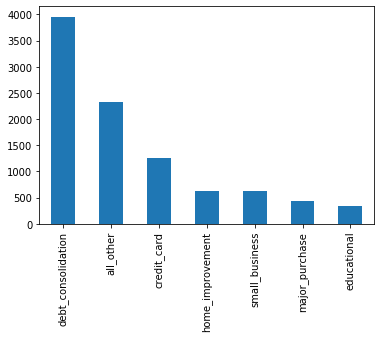

In [47]:
import matplotlib.pyplot as plt
df["purpose"].value_counts().plot(kind='bar')
plt.show()